In [1]:
%config Completer.use_jedi=False

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv(r'C:\Users\SWRAJ KANT SHARMA\Documents\Datasets\Neural Networks\Movie Rating\Train\Train.csv')

In [4]:
dataset.shape

(40000, 2)

In [5]:
dataset.head()

,review,label
0,mature intelligent and highly charged melodram...,pos
1,http://video.google.com/videoplay?docid=211772...,pos
2,Title: Opera (1987) Director: Dario Argento Ca...,pos
3,I think a lot of people just wrote this off as...,pos
4,This is a story of two dogs and a cat looking ...,pos


In [6]:
dataset['label'].value_counts()

pos    20011
neg    19989
Name: label, dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [8]:
y = dataset['label'].values

In [9]:
y = le.fit_transform(y)

In [10]:
y[:100]

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0])

In [11]:
dataset['review'][11]

'Robert Jordan is a television star. Robert Jordan likes things orderly, on time and properly executed. In his world children are to be seen, not heard. So why would Mr. Jordan want to become the master of a rambunctious band of Boy Scouts? Ratings. His staff figures that if learns how to interact with the youth, they will be more inclined to watch his show. Of course watching Jordan cope comprises most of the fun.<br /><br />Like Mr. Belvedere and Mr. Belvedere Goes to College this one is sure to please.<br /><br />ANYONE INTERESTED IN OBTAINING A COPY OF THIS FILM PLEASE WRITE TO ME AT: IAMASEAL2@YAHOO.COM'

In [12]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [13]:
sw = set(stopwords.words('english'))
ps = PorterStemmer()

In [14]:
def clean_text(sample):
    sample = sample.lower()
    sample = sample.replace("<br /><br />", "")
    sample = re.sub("[^a-zA-Z]+", " ", sample)
    
    sample = sample.split()
    
    sample = [ps.stem(s) for s in sample if s not in sw] # list comprehension
    
    sample = " ".join(sample)
    
    return sample

In [15]:
clean_text(dataset['review'][11])

'robert jordan televis star robert jordan like thing orderli time properli execut world children seen heard would mr jordan want becom master rambuncti band boy scout rate staff figur learn interact youth inclin watch show cours watch jordan cope compris fun like mr belveder mr belveder goe colleg one sure pleas anyon interest obtain copi film pleas write iamas yahoo com'

In [16]:
dataset['review'][11]

'Robert Jordan is a television star. Robert Jordan likes things orderly, on time and properly executed. In his world children are to be seen, not heard. So why would Mr. Jordan want to become the master of a rambunctious band of Boy Scouts? Ratings. His staff figures that if learns how to interact with the youth, they will be more inclined to watch his show. Of course watching Jordan cope comprises most of the fun.<br /><br />Like Mr. Belvedere and Mr. Belvedere Goes to College this one is sure to please.<br /><br />ANYONE INTERESTED IN OBTAINING A COPY OF THIS FILM PLEASE WRITE TO ME AT: IAMASEAL2@YAHOO.COM'

In [17]:
dataset['cleaned_review'] =  dataset['review'].apply(clean_text)

In [18]:
corpus = dataset['cleaned_review'].values

In [19]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [20]:
cv = CountVectorizer(max_df = 0.5, max_features=50000)

In [21]:
X = cv.fit_transform(corpus)

In [22]:
print(X[0])

  (0, 25164)	1
  (0, 20844)	1
  (0, 19380)	1
  (0, 5614)	1
  (0, 25586)	1
  (0, 44630)	1
  (0, 5865)	1
  (0, 47635)	2
  (0, 39858)	2
  (0, 29479)	1
  (0, 24065)	1
  (0, 43631)	1
  (0, 36914)	1
  (0, 35377)	1
  (0, 24500)	1
  (0, 41060)	1


In [23]:
tfidf = TfidfTransformer()

In [24]:
X = tfidf.fit_transform(X)

In [25]:
print(X[0])

  (0, 47635)	0.6321513717388632
  (0, 44630)	0.3746519680247996
  (0, 43631)	0.23311910175629735
  (0, 41060)	0.08954711515364625
  (0, 39858)	0.3479272455598334
  (0, 36914)	0.12838776347304318
  (0, 35377)	0.06795826262376209
  (0, 29479)	0.09772985843350443
  (0, 25586)	0.20294441928431647
  (0, 25164)	0.19660242704458164
  (0, 24500)	0.1861194711304735
  (0, 24065)	0.08393204950822558
  (0, 20844)	0.1534465249461136
  (0, 19380)	0.14306353810192265
  (0, 5865)	0.21267493705986773
  (0, 5614)	0.18757256999458938


In [26]:
X.shape

(40000, 50000)

In [27]:
y.shape

(40000,)

## Neural Network

In [28]:
from keras import models
from keras.layers import Dense

Using TensorFlow backend.


In [29]:
model = models.Sequential()
model.add( Dense(16, activation="relu", input_shape = (X.shape[1],) ) )
model.add( Dense(16, activation="relu") )
model.add( Dense(1, activation="sigmoid"))

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                800016    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 800,305
Trainable params: 800,305
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(optimizer='rmsprop', loss="binary_crossentropy", metrics=['accuracy'])

In [32]:
X_val = X[:5000]
X_train = X[5000:]

y_val = y[:5000]
y_train = y[5000:]

In [33]:
X_train.shape, y_train.shape

((35000, 50000), (35000,))

In [34]:
hist = model.fit(X, y, batch_size=128, epochs=2, validation_data=(X_val, y_val))

Train on 40000 samples, validate on 5000 samples
Epoch 1/2
40000/40000 [==============================] - 16s 407us/step - loss: 0.4199 - accuracy: 0.8582 - val_loss: 0.2158 - val_accuracy: 0.9160
Epoch 2/2
40000/40000 [==============================] - 16s 403us/step - loss: 0.2057 - accuracy: 0.9187 - val_loss: 0.1563 - val_accuracy: 0.9394


In [35]:
result = hist.history
print(result)

{'val_loss': [0.21581772999763488, 0.1563159375667572], 'val_accuracy': [0.9160000085830688, 0.9394000172615051], 'loss': [0.41990493931770323, 0.2057117633342743], 'accuracy': [0.8582, 0.918675]}


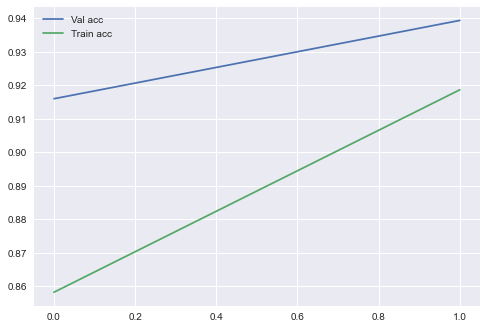

In [36]:
plt.style.use("seaborn")
plt.plot(result['val_accuracy'], label = "Val acc")
plt.plot(result['accuracy'], label = "Train acc")
plt.legend()
plt.show()

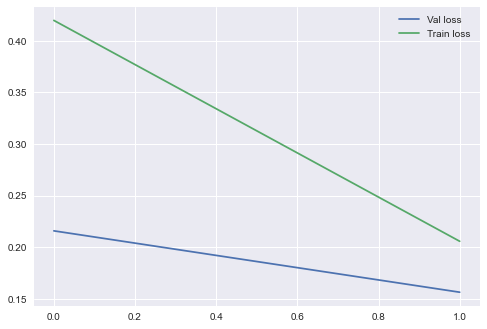

In [37]:
plt.plot(result['val_loss'], label = "Val loss")
plt.plot(result['loss'], label = "Train loss")
plt.legend()
plt.show()

In [38]:
model.evaluate(X_val, y_val)

5000/5000 [==============================] - 2s 418us/step


[0.15631593842506408, 0.9394000172615051]

# Test Time

In [39]:
test = pd.read_csv(r'C:\Users\SWRAJ KANT SHARMA\Documents\Datasets\Neural Networks\Movie Rating\Test\Test.csv')

In [40]:
test.shape

(10000, 1)

In [41]:
test.head()

,review
0,Remember those old kung fu movies we used to w...
1,This movie is another one on my List of Movies...
2,How in the world does a thing like this get in...
3,"""Queen of the Damned"" is one of the best vampi..."
4,The Caprica episode (S01E01) is well done as a...


In [42]:
test['cleaned_review'] = test['review'].apply(clean_text)

In [43]:
X_test = test['cleaned_review']

In [44]:
X_test = cv.transform(X_test)

In [45]:
X_test.shape

(10000, 50000)

In [46]:
X_test = tfidf.transform(X_test)

In [47]:
y_pred = model.predict(X_test)

In [48]:
y_pred[ y_pred >= 0.5 ]  =  1

In [49]:
y_pred = y_pred.astype('int')

In [50]:
y_pred[:10]

array([[0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1]])

In [51]:
dic = {0 : 'neg' , 1 : 'pos'}
y_pred = [ dic[p[0]] for p in y_pred ]

In [52]:
ids = np.arange(10000)

In [53]:
final_matrix = np.stack((ids, y_pred), axis =1)

In [54]:
df = pd.DataFrame(final_matrix, columns=['Id', 'label'])

In [55]:
df.to_csv("y_pred.csv", index = False)